#Paquetes necesarios

In [7]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

TAREA: Realiza la cuenta de píxeles blancos por filas (en lugar de por columnas). Determina el valor máximo de píxeles blancos para filas, maxfil, mostrando el número de filas y sus respectivas posiciones, con un número de píxeles blancos mayor o igual que 0.95*maxfil.

El valor máximo en las filas es 0.4296875
El número de filas con un valor mayor o igual al maxfil es 2 y sus posiciones [ 12 100]


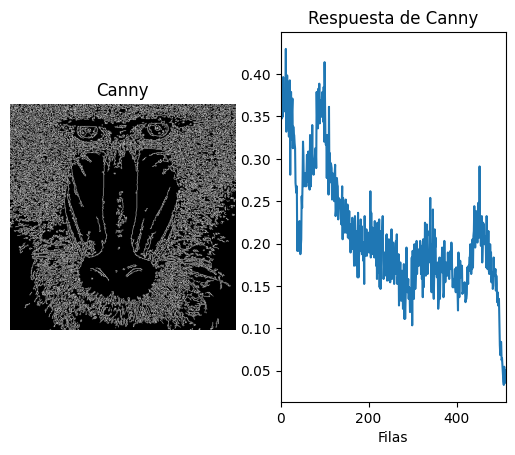

In [54]:
img = cv2.imread('mandril.jpg')
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gris, 100, 200)

#Cuenta el número de píxeles blancos (255) por columna
#Suma los valores de los pixeles por fila
row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

#Normaliza en base al número de columnas (segundo valor de shape) y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por fila
rows = row_counts[:,0] / (255 * canny.shape[1])

#Fijar el valor máximo de píxeles blancos por fila
maxfil = np.max(rows)

#Encuentra las filas con nº de píxeles blancos mayor o igual a 0.95*maxfil
threshold = 0.95 * maxfil
final_rows = np.where(rows >= threshold)[0]

#Muestra dicha cuenta gráficamente
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(rows)
#Rango en x definido por las filas
plt.xlim([0, canny.shape[0]])

print(f"El valor máximo en las filas es {maxfil}")
print(f"El número de filas con un valor mayor o igual al maxfil es {len(final_rows)} y sus posiciones {final_rows}")

TAREA: Aplica umbralizado a la imagen resultante de Sobel (convertida a 8 bits), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny de píxeles no nulos. Calcula el valor máximo de la cuenta por filas y columnas, y determina las filas y columnas por encima del 0.95*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen. ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

Sobel
El valor máximo en las filas es 0.4921875
El número de filas con un valor mayor o igual al maxfil es 8 y sus posiciones [ 3  4  8 11 12 19 24 99]
El valor máximo en las filas es 0.482421875
El número de filas con un valor mayor o igual al maxcol es 3 y sus posiciones [104 105 127]

Canny
El valor máximo en las filas es 0.4296875
El número de filas con un valor mayor o igual al maxfil es 2 y sus posiciones [ 12 100]
El valor máximo en las filas es 0.365234375
El número de filas con un valor mayor o igual al maxcol es 6 y sus posiciones [ 92  99 104 115 119 383]



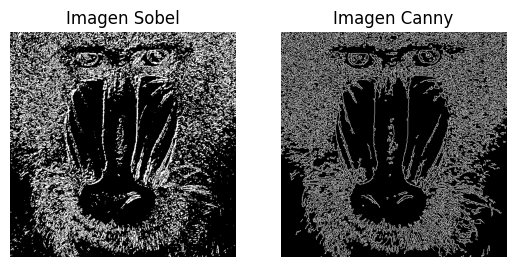

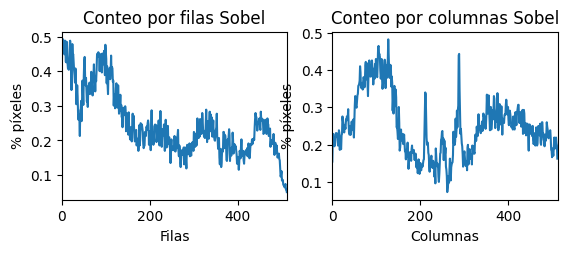

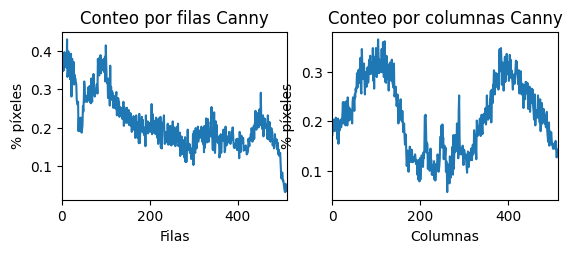

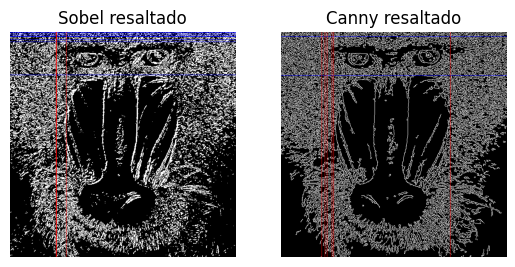

In [56]:
def generate_histogram_data(img, name):
    row_counts = cv2.reduce(img, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
    col_counts = cv2.reduce(img, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

    rows = row_counts[:, 0] / (255 * sobel.shape[1])
    cols = col_counts[0] / (255 * sobel.shape[0])

    maxfil = np.max(rows)
    maxcol = np.max(cols)

    threshold_rows = 0.95 * maxfil
    final_rows = np.where(rows >= threshold_rows)[0]

    print(name)
    print(f"El valor máximo en las filas es {maxfil}")
    print(f"El número de filas con un valor mayor o igual al maxfil es {len(final_rows)} y sus posiciones {final_rows}")

    threshold_cols = 0.95 * maxcol
    final_cols = np.where(cols >= threshold_cols)[0]

    print(f"El valor máximo en las filas es {maxcol}")
    print(f"El número de filas con un valor mayor o igual al maxcol es {len(final_cols)} y sus posiciones {final_cols}")
    print()

    # Remarcar filas y columnas
    img_marked = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

    for fila in final_rows:
        cv2.line(img_marked, (0, fila), (img_marked.shape[1], fila), (0, 0, 255), 1)

    for col in final_cols:
        cv2.line(img_marked, (col, 0), (col, img_marked.shape[0]), (255, 0, 0), 1)

    return rows, cols, img_marked

def generate_histograms(img1, img2):

    img1_rows, img1_cols, img1_marked = generate_histogram_data(img1, "Sobel")
    img2_rows, img2_cols, img2_marked = generate_histogram_data(img2, "Canny")

    plt.figure()
    plt.subplot(1, 2, 1)
    plt.title("Imagen Sobel")
    plt.axis("off")
    plt.imshow(img1, cmap='gray')
    plt.subplot(1, 2, 2)
    plt.title("Imagen Canny")
    plt.axis("off")
    plt.imshow(img2, cmap='gray')

    plt.figure()
    plt.subplot(2, 2, 1)
    plt.title("Conteo por filas Sobel")
    plt.xlabel("Filas")
    plt.ylabel("% píxeles")
    plt.plot(img1_rows)
    plt.xlim([0, img1.shape[0]])

    plt.subplot(2, 2, 2)
    plt.title("Conteo por columnas Sobel")
    plt.xlabel("Columnas")
    plt.ylabel("% píxeles")
    plt.plot(img1_cols)
    plt.xlim([0, img1.shape[1]])

    plt.figure()
    plt.subplot(2, 2, 3)
    plt.title("Conteo por filas Canny")
    plt.xlabel("Filas")
    plt.ylabel("% píxeles")
    plt.plot(img2_rows)
    plt.xlim([0, img2.shape[0]])

    plt.subplot(2, 2, 4)
    plt.title("Conteo por columnas Canny")
    plt.xlabel("Columnas")
    plt.ylabel("% píxeles")
    plt.plot(img2_cols)
    plt.xlim([0, img2.shape[1]])


    plt.figure()
    plt.subplot(1, 2, 1)
    plt.title("Sobel resaltado")
    plt.imshow(img1_marked)
    plt.axis("off")
    plt.subplot(1, 2, 2)
    plt.title("Canny resaltado")
    plt.imshow(img2_marked)
    plt.axis("off")
    plt.show()

ggris = cv2.GaussianBlur(gris, (3, 3), 0)

#Calcula sobel en ambas direcciones (horizontal y vertical)
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y
#Combina ambos resultados
sobel = cv2.add(sobelx, sobely)

#Conversión de la imagen
sobel8 = np.uint8(np.abs(sobel))

_, sobel_umbralizado = cv2.threshold(sobel8, 80, 255, cv2.THRESH_BINARY)

generate_histograms(sobel_umbralizado, canny)

TAREA: Proponer un demostrador que capture las imágenes de la cámara, y les permita exhibir lo aprendido en estas dos prácticas ante quienes no cursen la asignatura :). Es por ello que además de poder mostrar la imagen original de la webcam, incluya al menos dos usos diferentes de aplicar las funciones de OpenCV trabajadas hasta ahora.


In [24]:
def max_color_filter(image):
    color_image = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)
    b = image[:, :, 0]
    g = image[:, :, 1]
    r = image[:, :, 2]
    red_mask = (r >= g) & (r >= b)
    green_mask = (g > r) & (g >= b)
    blue_mask = (b > r) & (b > g)
    color_image[blue_mask] = [255, 0, 0]
    color_image[green_mask] = [0, 255, 0]
    color_image[red_mask] = [0, 0, 255]
    return color_image

def pixel_filter(frame, pframe):
    gray1 = cv2.cvtColor(pframe, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    _, imgdif = cv2.threshold(cv2.absdiff(gray1, gray2), 30, 255, cv2.THRESH_BINARY)
    changed_pixels = np.count_nonzero(imgdif)
    total_pixels = frame.shape[0] * frame.shape[1]
    scale_factor = max(1, int(changed_pixels / total_pixels * 500))
    pixel_frame = cv2.resize(frame, (frame.shape[1] // scale_factor, frame.shape[0] // scale_factor))
    return cv2.resize(pixel_frame, (frame.shape[1], frame.shape[0]), interpolation=cv2.INTER_NEAREST)


vid = cv2.VideoCapture(0)
mode = 1
pframe = None
while (True):
    ret, frame = vid.read()
    if ret:
        if mode == 1:
            cv2.imshow('Modo Normal', frame)
        elif mode == 2:
            if pframe is None:
                pframe = frame.copy()
                continue
            cv2.imshow('Modo pixelado en movimiento', pixel_filter(frame, pframe))
            pframe = frame.copy()
        elif mode == 3:
            cv2.imshow('Modo Color', max_color_filter(frame))

    if cv2.waitKey(2) == 27:
        break
    elif cv2.waitKey(2) == 49 and mode != 1:
        mode = 1
        cv2.destroyAllWindows()
    elif cv2.waitKey(2) == 50 and mode != 2:
        mode = 2
        cv2.destroyAllWindows()
    elif cv2.waitKey(2) == 51 and mode != 3:
        mode = 3
        cv2.destroyAllWindows()

vid.release()
cv2.destroyAllWindows()

TAREA: Tras ver los vídeos [My little piece of privacy](https://www.niklasroy.com/project/88/my-little-piece-of-privacy), [Messa di voce](https://youtu.be/GfoqiyB1ndE?feature=shared) y [Virtual air guitar](https://youtu.be/FIAmyoEpV5c?feature=shared) proponer un demostrador reinterpretando la parte de procesamiento de la imagen, tomando como punto de partida alguna de dichas instalaciones.

In [48]:
import cv2
import numpy as np
import random

def draw_lines_in_borders(frame, canny_frame):
    lines = cv2.HoughLinesP(canny_frame, 1, np.pi / 180, 100, minLineLength=50, maxLineGap=30)

    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
            grosor = random.randint(1, 5)
            cv2.line(frame, (x1, y1), (x2, y2), color, grosor)

def draw_circles_in_contours(frame, canny_frame):
    contours, _ = cv2.findContours(canny_frame, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        if cv2.contourArea(contour) > 300:
            for i in range(5):
                x, y = contour[random.randint(0, len(contour) - 1)][0]
                radius = random.randint(2, 10)
                color = (random.randint(100, 255), random.randint(100, 255), 255)
                cv2.circle(frame, (x, y), radius, color, -1)

vid = cv2.VideoCapture(0)
while True:
    ret, frame = vid.read()
    if not ret:
        break

    # Convertir el frame a escala de grises
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Aplicar suavizado para reducir el ruido antes de Canny
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    canny_frame = cv2.Canny(blurred, 100, 150)
    pframe = frame.copy()

    draw_circles_in_contours(frame, canny_frame)
    draw_lines_in_borders(pframe, canny_frame)

    resultado = np.hstack((cv2.cvtColor(canny_frame, cv2.COLOR_GRAY2BGR), frame, pframe))  # Comparación lado a lado
    cv2.imshow('Bordes y Recintos', resultado)

    if cv2.waitKey(2) == 27:
        break

vid.release()
cv2.destroyAllWindows()